# Self Driving Car Engineer
## Project: Traffic Sign Classification
***
In this project, it is aimed to classify traffic signs on the road

### Step 0: The data is loaded


In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p" 
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Step 1: Dataset summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:
- 'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- 'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
- 'sizes' is a list containing tuples, (width, height) representing the original width and height the image.
- 'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


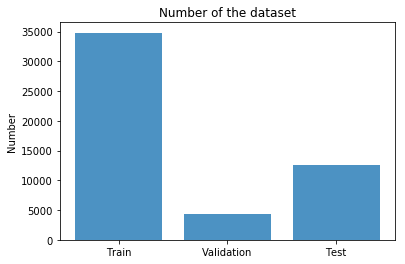

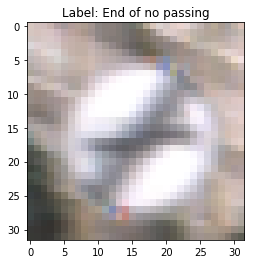

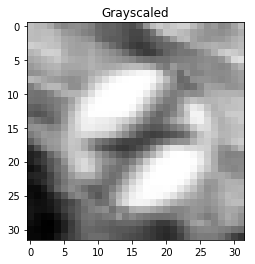

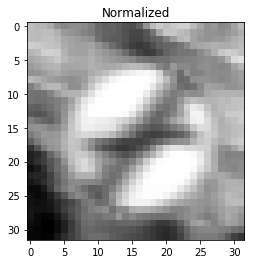

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

# The file, sign names are stored in, is read 
df=pd.read_csv('signnames.csv', sep=',',header=None)
sign_names = df.values

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
 
objects = ('Train', 'Validation', 'Test')
y_pos = np.arange(len(objects))
performance = [n_train, n_validation, n_test]
 
plt.bar(y_pos, performance, align='center', alpha=.8)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Number of the dataset')
 
plt.show()

img = X_train[50,:,:,:]
plt.figure()
plt.imshow(img)
plt.title('Label: '+str(sign_names[y_train[50],1]))
img2 = grayscale_single(img)
plt.figure()
plt.imshow(img2,cmap='gray')
plt.title('Grayscaled')
img3 = normalize_single(img2)
plt.figure()
plt.imshow(img3,cmap='gray')
plt.title('Normalized')

### Step 2: Pre-processing the data

In this step, the whole dataset (train, validation and test sets) are converted to grayscale at first. Then, it is normalized between 0-1

In [3]:
import cv2
from sklearn.preprocessing import OneHotEncoder

def grayscale_single(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def normalize_single(image):
    return image/255.0

def preprocess_single(image):
    img = grayscale_single(image)
    img = normalize_single(img)
    image_reshaped = img.reshape(img.shape[0],img.shape[1],1)
    
    return image_reshaped
    

def grayscale(train, valid, test):
    #In this function train, validation and test sets are converted to grayscale
    train_size = train.shape[0]
    valid_size = valid.shape[0]
    test_size = test.shape[0]
    
    train_grayscale = np.zeros([train_size,train.shape[1],train.shape[2]])
    valid_grayscale = np.zeros([valid_size,valid.shape[1],valid.shape[2]])
    test_grayscale = np.zeros([test_size,test.shape[1],test.shape[2]])
    
    for i in range(train_size):
        train_grayscale[i,:,:] = cv2.cvtColor(train[i], cv2.COLOR_RGB2GRAY)
        
    for i in range(valid_size):
        valid_grayscale[i,:,:] = cv2.cvtColor(valid[i], cv2.COLOR_RGB2GRAY)
        
    for i in range(test_size):
        test_grayscale[i,:,:] = cv2.cvtColor(test[i], cv2.COLOR_RGB2GRAY)
                
    return (train_grayscale, valid_grayscale, test_grayscale)
        
def normalize(train, valid, test):
    #In this function train, validation and test sets are normalized
    train_normalized = train / 255.0
    valid_normalized = valid / 255.0
    test_normalized = test / 255.0
    
    return (train_normalized, valid_normalized, test)


def preprocess_data(Xtrain, Xvalid, Xtest, ytrain, yvalid, ytest):
    #First, images are converted to grayscale mode. 
    train_grayscale, valid_grayscale, test_grayscale = grayscale(Xtrain, Xvalid, Xtest)
    #Then they are normalized between 0-1
    train_normalized, valid_normalized, test_normalized = normalize(train_grayscale, valid_grayscale, test_grayscale)
    
    #They are reshaped into (nx32x32x1) sized tensors
    X_train = train_normalized.reshape(train_normalized.shape[0],train_normalized.shape[1],train_normalized.shape[2],1)
    X_valid = valid_normalized.reshape(valid_normalized.shape[0],valid_normalized.shape[1],valid_normalized.shape[2],1)
    X_test = test_normalized.reshape(test_normalized.shape[0],test_normalized.shape[1],test_normalized.shape[2],1)
    
    #Label is nx1 vector. We transform it into nxn_classes by using onehotencoder library 
    encoder = OneHotEncoder()
    y_train, y_valid, y_test = ytrain.reshape(-1,1), yvalid.reshape(-1,1), ytest.reshape(-1,1)
    encoder.fit(y_train)
    y_train, y_valid, y_test = encoder.transform(y_train), encoder.transform(y_valid), encoder.transform(y_test)
    y_train, y_valid, y_test = y_train.toarray(), y_valid.toarray(), y_test.toarray()
    
    #All data type should be float32
    X_train, y_train = X_train.astype(np.float32), y_train.astype(np.float32)
    X_valid, y_valid = X_valid.astype(np.float32), y_valid.astype(np.float32)
    X_test, y_test = X_test.astype(np.float32), y_test.astype(np.float32)
    
    return (X_train, X_valid, X_test, y_train, y_valid, y_test)


Xtrain, Xvalid, Xtest, ytrain, yvalid, ytest = preprocess_data(X_train, X_valid, X_test, y_train, y_valid, y_test)

### Step 3: Model Architecture

In this step, a function is defined in order to make the convolutional network run. For this purpose, weights are initialized as random values from the normal distribution with specified mean and standard deviation values. Bias values are initialized as zero at first. There are 2 convolution layer with 38 and 64 depth layers and 2 hidden layer of 100 sizes. 

In [4]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def ConvNet(x, dropout):
    mu, sigma = 0, 0.1

    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape=(5,5,1,38), mean=mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape=(5,5,38,64), mean=mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal(shape=(5*5*64,100), mean=mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal(shape=(100,100), mean=mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal(shape=(100,n_classes), mean=mu, stddev = sigma))
        }

    biases = {
        'bc1': tf.Variable(tf.zeros([38])),
        'bc2': tf.Variable(tf.zeros([64])),
        'bd1': tf.Variable(tf.zeros([100])),
        'bd2': tf.Variable(tf.zeros([100])),
        'out': tf.Variable(tf.zeros([n_classes]))
    }

    #x is 32x32x1 sized array
    #conv_layer1 is 28x28x38 sized array
    conv_layer1 = tf.nn.conv2d(x,weights['wc1'],strides=[1,1,1,1],padding='VALID',name='conv1')
    conv_layer1 = tf.nn.bias_add(conv_layer1, biases['bc1'])
    conv_layer1 = tf.nn.relu(conv_layer1)

    #conv_layer1 is 14x14x38 sized array after max pooling process
    conv_layer1 = tf.nn.max_pool(conv_layer1,ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

    #conv_layer2 is 10x10x108 sized array after convolution process
    conv_layer2 = tf.nn.conv2d(conv_layer1,weights['wc2'],strides=[1,1,1,1],padding='VALID',name='conv2')
    conv_layer2 = tf.nn.bias_add(conv_layer2, biases['bc2'])
    conv_layer2 = tf.nn.relu(conv_layer2)

    #conv_layer2 is 5x5x108 sized array after max pooling process
    conv_layer2 = tf.nn.max_pool(conv_layer2,ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

    flat_layer1 = flatten(conv_layer2)
    flat_layer1 = tf.add(tf.matmul(flat_layer1, weights['wd1']), biases['bd1'])
    flat_layer1 = tf.nn.relu(flat_layer1)
    flat_layer1 = tf.nn.dropout(flat_layer1, keep_prob=dropout)

    flat_layer2 = tf.add(tf.matmul(flat_layer1, weights['wd2']), biases['bd2'])
    flat_layer2 = tf.nn.relu(flat_layer2)
    flat_layer2 = tf.nn.dropout(flat_layer2, keep_prob=dropout)

    out = tf.add(tf.matmul(flat_layer2, weights['out']), biases['out'])
    
    return out

In [5]:
#Input image size will be nx32x32x1. We use None in case the number of the images is not known
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# Classification over n_classes different signs
y = tf.placeholder(tf.float32, (None, n_classes))
#We define keep_prob in order to use this for dropout regularization
keep_prob = tf.placeholder(tf.float32)
fc2 = ConvNet(x, keep_prob)

#We define loss_operation by using softmax_cross_entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=fc2, labels=y)
loss_op = tf.reduce_mean(cross_entropy)
#We use Adamoptimizer instead of Gradient Descent method
opt = tf.train.AdamOptimizer()
#We minimize the cost by using the optimizer
train_op = opt.minimize(loss_op)
#We find out how many correct predictions there are by comparing the labels and the results from the model 
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
#We get mean value to find the accuracy value
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
from sklearn.utils import shuffle

saver = tf.train.Saver()

def eval_data(Xvalid, yvalid, batch_size):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = Xvalid.shape[0] // batch_size
    num_examples = steps_per_epoch * batch_size
    total_acc, total_loss = 0, 0
    sess = tf.get_default_session()
    for step in range(steps_per_epoch):
        start_idx, end_idx = step*batch_size, (step+1)*batch_size
        batch_x, batch_y = Xvalid[start_idx:end_idx], yvalid[start_idx:end_idx]
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples


if __name__ == '__main__':
    
    # Load data
    EPOCHS = 10
    BATCH_SIZE = 50
    dropout = 0.65  # Dropout, probability to keep units

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        steps_per_epoch = n_train // BATCH_SIZE
        num_examples = steps_per_epoch * BATCH_SIZE

        # Train model
        for i in range(EPOCHS):
            #We shuffle data in each epoch
            Xtrain, ytrain = shuffle(Xtrain, ytrain)
            Xvalid, yvalid = shuffle(Xvalid, yvalid)
            Xtest, ytest = shuffle(Xtest, ytest)
            
            for step in range(steps_per_epoch):
                start_idx, end_idx = step*BATCH_SIZE, (step+1)*BATCH_SIZE
                batch_x, batch_y = Xtrain[start_idx:end_idx], ytrain[start_idx:end_idx]
                loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob:dropout})

            val_loss, val_acc = eval_data(Xvalid, yvalid, BATCH_SIZE)
            print("EPOCH {} ...".format(i+1))
            print("Validation loss = {:.3f}".format(val_loss))
            print("Validation accuracy = {:.3f}".format(val_acc))
            print()

        saver.save(sess, './sign_classification')

EPOCH 1 ...
Validation loss = 0.546
Validation accuracy = 0.842

EPOCH 2 ...
Validation loss = 0.326
Validation accuracy = 0.907

EPOCH 3 ...
Validation loss = 0.239
Validation accuracy = 0.944

EPOCH 4 ...
Validation loss = 0.258
Validation accuracy = 0.941

EPOCH 5 ...
Validation loss = 0.253
Validation accuracy = 0.937

EPOCH 6 ...
Validation loss = 0.202
Validation accuracy = 0.950

EPOCH 7 ...
Validation loss = 0.191
Validation accuracy = 0.958

EPOCH 8 ...
Validation loss = 0.141
Validation accuracy = 0.962

EPOCH 9 ...
Validation loss = 0.212
Validation accuracy = 0.956

EPOCH 10 ...
Validation loss = 0.211
Validation accuracy = 0.959



In [11]:
#We test the model on test dataset which have never been used before
with tf.Session() as sess:
    saver.restore(sess,'./sign_classification')
    train_loss, train_acc = eval_data(Xtrain, ytrain, BATCH_SIZE)
    test_loss, test_acc = eval_data(Xtest, ytest, BATCH_SIZE)
    print("Train loss = {:.3f}".format(train_loss))
    print("Train accuracy = {:.3f}".format(train_acc))
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))

INFO:tensorflow:Restoring parameters from ./sign_classification
Train loss = 0.010
Train accuracy = 0.997
Test loss = 47.434
Test accuracy = 0.937


### Step 3: Testing the Model on New Images

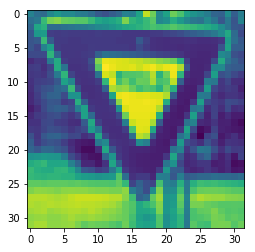

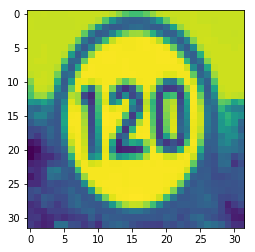

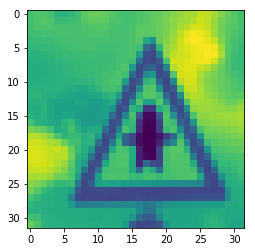

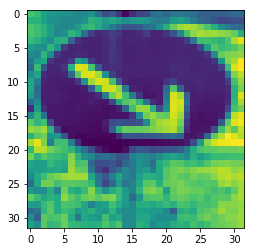

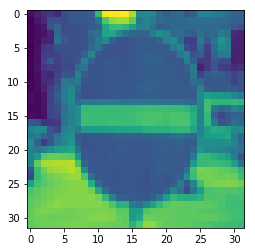

In [24]:
import scipy as sci

n_images = 5
test_images = np.zeros((n_images,32,32,1))
labels = ["Yield","Speed limit (120km/h)","Right-of-way at the next intersection","Keep right","No entry"]
for i in range(n_images):
    path = "./examples/"+str(i+1) + '.jpg'
    img = sci.ndimage.imread(path)
    img2 = sci.misc.imresize(img, (32, 32, 3))
    test_images[i,:,:,:] = preprocess_single(img2)
    plt.figure()
    plt.imshow(test_images[i,:,:,0])

In [25]:
with tf.Session() as sess:
    saver.restore(sess,'./sign_classification')
    test_logits = sess.run(tf.nn.softmax(fc2), feed_dict={x:test_images, keep_prob:1.0})
    predict = np.argmax(test_logits, 1)

INFO:tensorflow:Restoring parameters from ./sign_classification


Accuracy:  0.8


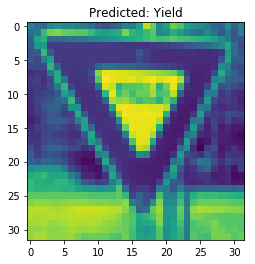

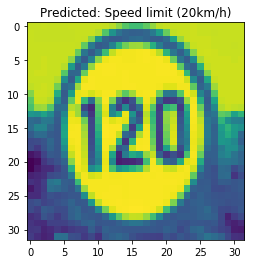

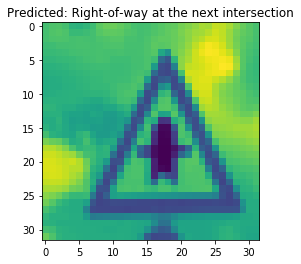

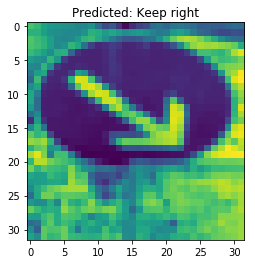

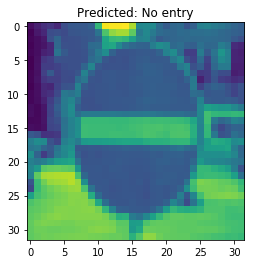

In [26]:
cnt = 0
for i in range(n_images):
    plt.figure()
    plt.imshow(test_images[i,:,:,0])
    plt.title("Predicted: "+sign_names[predict[i],1])
    if sign_names[predict[i],1]==labels[i]:
        cnt += 1
print ("Accuracy: ", cnt/n_images)    

In [27]:
#We can see the three largest values for each image below
with tf.Session() as sess:
    max_5_logits = sess.run(tf.nn.top_k(test_logits, k=3))
max_5_logits

TopKV2(values=array([[  1.00000000e+00,   1.26435361e-13,   8.17833485e-14],
       [  8.06542337e-01,   1.30036950e-01,   4.23044115e-02],
       [  1.00000000e+00,   7.20019322e-11,   1.68979431e-11],
       [  9.99997139e-01,   1.77610480e-06,   8.78546643e-07],
       [  1.00000000e+00,   1.88085048e-10,   1.38627554e-10]], dtype=float32), indices=array([[13, 15,  9],
       [ 0,  7,  8],
       [11, 27, 30],
       [38, 13, 17],
       [17, 34, 14]]))